<a href="https://colab.research.google.com/github/shivangisaharoy/TextClassification_news/blob/main/Copy_of_Shiwangi_TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Code by Shivangi**

Problem statement: The dataset contains information aboutthe news titles, source URL, publication name and date.
Risk heading column contains the sub classification of the text, the 'Target' field is the main field that labels out the final text classification.

In [ ]:
import numpy as np
import pandas as pd
import re
import string

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 2000)

<ipython-input-385-97228e60b99f>:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Load Training Data_Feb17.xlsx

In [ ]:
data = pd.read_excel("Training Data_Feb17.xlsx",sheet_name="Training Data")
data.head(5)

,ID,Title,URL,PublicationName,PublishedDate,Risk Heading,Target,Category
0,I0001,Climate change protesters fined over 'Last Supper' protest - ABC News,https://news.google.com/rss/articles/CBMiZmh0dHBzOi8vYWJjbmV3cy5nby5jb20vSW50ZXJuYXRpb25hbC93aXJlU3RvcnkvY2xpbWF0ZS1jaGFuZ2UtcHJvdGVzdGVycy1maW5lZC1zdXBwZXItcHJvdGVzdC05Njk4ODQ0ONIBamh0dHBzOi8vYWJjbmV3cy5nby5jb20vYW1wL0ludGVybmF0aW9uYWwvd2lyZVN0b3J5L2NsaW1hdGUtY2hhbmdlLXByb3Rlc3RlcnMtZmluZWQtc3VwcGVyLXByb3Rlc3QtOTY5ODg0NDg?oc=5,ABC News,"Wed, 08 Feb 2023 21:42:15 GMT",Litigation,Litigation,1
1,I0002,Shell directors personally sued over ‘flawed’ climate strategy - The Guardian,https://news.google.com/rss/articles/CBMicGh0dHBzOi8vd3d3LnRoZWd1YXJkaWFuLmNvbS9lbnZpcm9ubWVudC8yMDIzL2ZlYi8wOS9zaGVsbC1kaXJlY3RvcnMtcGVyc29uYWxseS1zdWVkLW92ZXItZmxhd2VkLWNsaW1hdGUtc3RyYXRlZ3nSAXBodHRwczovL2FtcC50aGVndWFyZGlhbi5jb20vZW52aXJvbm1lbnQvMjAyMy9mZWIvMDkvc2hlbGwtZGlyZWN0b3JzLXBlcnNvbmFsbHktc3VlZC1vdmVyLWZsYXdlZC1jbGltYXRlLXN0cmF0ZWd5?oc=5,The Guardian,"Thu, 09 Feb 2023 06:01:00 GMT",Litigation,Litigation,1
2,I0003,Big banks invest $45m in carbon credit transaction network - Finextra,https://news.google.com/rss/articles/CBMiZGh0dHBzOi8vd3d3LmZpbmV4dHJhLmNvbS9uZXdzYXJ0aWNsZS80MTc2MC9iaWctYmFua3MtaW52ZXN0LTQ1bS1pbi1jYXJib24tY3JlZGl0LXRyYW5zYWN0aW9uLW5ldHdvcmvSAQA?oc=5,Finextra,"Thu, 09 Feb 2023 00:01:32 GMT",Corporate Initiatives,Others,1
3,I0004,Signs of ancient climate crisis as the Hittite empire unravelled - Nature.com,https://news.google.com/rss/articles/CBMiMmh0dHBzOi8vd3d3Lm5hdHVyZS5jb20vYXJ0aWNsZXMvZDQxNTg2LTAyMy0wMDI3MS0y0gEA?oc=5,Nature.com,"Wed, 08 Feb 2023 16:18:48 GMT",Others,Others,3
4,I0005,State officials call Rio Grande settlement with Texas a good deal - Santa Fe New Mexican,https://news.google.com/rss/articles/CBMipQFodHRwczovL3d3dy5zYW50YWZlbmV3bWV4aWNhbi5jb20vbmV3cy9sb2NhbF9uZXdzL3N0YXRlLW9mZmljaWFscy1jYWxsLXJpby1ncmFuZGUtc2V0dGxlbWVudC13aXRoLXRleGFzLWEtZ29vZC1kZWFsL2FydGljbGVfNjk1YzZlN2EtYTcwNi0xMWVkLTg1NzMtZDMyMTkwNjM1NWMxLmh0bWzSAQA?oc=5,Santa Fe New Mexican,"Thu, 09 Feb 2023 03:15:00 GMT",Litigation,Litigation,2


In [ ]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#data['Target_num']= label_encoder.fit_transform(data['Target'])
#data['Target_num'].unique()


# row count=4701

In [ ]:
data.shape

(4701, 8)

In [ ]:

data.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4701 non-null   object
 1   Title            4701 non-null   object
 2   URL              4701 non-null   object
 3   PublicationName  4700 non-null   object
 4   PublishedDate    4701 non-null   object
 5   Risk Heading     4701 non-null   object
 6   Target           4701 non-null   object
 7   Category         4701 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 293.9+ KB


# Target field: Others, Litigation, Greenwashing

In [ ]:
data['Target'].value_counts()

Others          4152
Litigation      368 
Greenwashing    181 
Name: Target, dtype: int64

In [ ]:
data.dtypes

ID                 object
Title              object
URL                object
PublicationName    object
PublishedDate      object
Risk Heading       object
Target             object
Category           int64 
dtype: object

# Combine Target+Category----->9 classification categories

The category field defines the priority of the classified data, the ones that has a priority of '1' can be considered as a high risk data and can be analysed further and a recommendation system can be created.

In [ ]:
data['Target_combined'] = data['Target'].astype('str') + '_' + data['Category'].astype('str')
data = data.rename(columns = {'Target_combined': 'TargetLabel'}, inplace = False)
data.head()

,ID,Title,URL,PublicationName,PublishedDate,Risk Heading,Target,Category,TargetLabel
0,I0001,Climate change protesters fined over 'Last Supper' protest - ABC News,https://news.google.com/rss/articles/CBMiZmh0dHBzOi8vYWJjbmV3cy5nby5jb20vSW50ZXJuYXRpb25hbC93aXJlU3RvcnkvY2xpbWF0ZS1jaGFuZ2UtcHJvdGVzdGVycy1maW5lZC1zdXBwZXItcHJvdGVzdC05Njk4ODQ0ONIBamh0dHBzOi8vYWJjbmV3cy5nby5jb20vYW1wL0ludGVybmF0aW9uYWwvd2lyZVN0b3J5L2NsaW1hdGUtY2hhbmdlLXByb3Rlc3RlcnMtZmluZWQtc3VwcGVyLXByb3Rlc3QtOTY5ODg0NDg?oc=5,ABC News,"Wed, 08 Feb 2023 21:42:15 GMT",Litigation,Litigation,1,Litigation_1
1,I0002,Shell directors personally sued over ‘flawed’ climate strategy - The Guardian,https://news.google.com/rss/articles/CBMicGh0dHBzOi8vd3d3LnRoZWd1YXJkaWFuLmNvbS9lbnZpcm9ubWVudC8yMDIzL2ZlYi8wOS9zaGVsbC1kaXJlY3RvcnMtcGVyc29uYWxseS1zdWVkLW92ZXItZmxhd2VkLWNsaW1hdGUtc3RyYXRlZ3nSAXBodHRwczovL2FtcC50aGVndWFyZGlhbi5jb20vZW52aXJvbm1lbnQvMjAyMy9mZWIvMDkvc2hlbGwtZGlyZWN0b3JzLXBlcnNvbmFsbHktc3VlZC1vdmVyLWZsYXdlZC1jbGltYXRlLXN0cmF0ZWd5?oc=5,The Guardian,"Thu, 09 Feb 2023 06:01:00 GMT",Litigation,Litigation,1,Litigation_1
2,I0003,Big banks invest $45m in carbon credit transaction network - Finextra,https://news.google.com/rss/articles/CBMiZGh0dHBzOi8vd3d3LmZpbmV4dHJhLmNvbS9uZXdzYXJ0aWNsZS80MTc2MC9iaWctYmFua3MtaW52ZXN0LTQ1bS1pbi1jYXJib24tY3JlZGl0LXRyYW5zYWN0aW9uLW5ldHdvcmvSAQA?oc=5,Finextra,"Thu, 09 Feb 2023 00:01:32 GMT",Corporate Initiatives,Others,1,Others_1
3,I0004,Signs of ancient climate crisis as the Hittite empire unravelled - Nature.com,https://news.google.com/rss/articles/CBMiMmh0dHBzOi8vd3d3Lm5hdHVyZS5jb20vYXJ0aWNsZXMvZDQxNTg2LTAyMy0wMDI3MS0y0gEA?oc=5,Nature.com,"Wed, 08 Feb 2023 16:18:48 GMT",Others,Others,3,Others_3
4,I0005,State officials call Rio Grande settlement with Texas a good deal - Santa Fe New Mexican,https://news.google.com/rss/articles/CBMipQFodHRwczovL3d3dy5zYW50YWZlbmV3bWV4aWNhbi5jb20vbmV3cy9sb2NhbF9uZXdzL3N0YXRlLW9mZmljaWFscy1jYWxsLXJpby1ncmFuZGUtc2V0dGxlbWVudC13aXRoLXRleGFzLWEtZ29vZC1kZWFsL2FydGljbGVfNjk1YzZlN2EtYTcwNi0xMWVkLTg1NzMtZDMyMTkwNjM1NWMxLmh0bWzSAQA?oc=5,Santa Fe New Mexican,"Thu, 09 Feb 2023 03:15:00 GMT",Litigation,Litigation,2,Litigation_2


In [ ]:
#data['TargetLabel']=data['TargetLabel'].str.replace('[^0-9]', '', regex=True).astype('int64')

In [ ]:
data.dtypes

ID                 object
Title              object
URL                object
PublicationName    object
PublishedDate      object
Risk Heading       object
Target             object
Category           int64 
TargetLabel        object
dtype: object

In [ ]:
data.tail(30)

,ID,Title,URL,PublicationName,PublishedDate,Risk Heading,Target,Category,TargetLabel
4671,I4672,Net zero: Britain halfway to hitting 2050 target on carbon emissions,https://www.telegraph.co.uk/news/2021/03/18/net-zero-britain-halfway-hitting-2050-target-carbon-emissions/,The Telegraph,2021-03-18 00:00:00,Regulation,Others,1,Others_1
4672,I4673,Sovereign rating cuts coming to those who ignore the climate,https://www.bloomberg.com/news/articles/2021-03-18/sovereign-rating-cuts-coming-to-those-who-ignore-climate-change?sref=8bGkqjUx,Bloomberg,2021-03-18 00:00:00,Ratings Downgrade,Others,1,Others_1
4673,I4674,Lebanon increases climate goal despite political and economic turmoil,https://www.climatechangenews.com/2021/03/17/lebanon-increases-climate-goal-despite-political-economic-turmoil/,Climate Change News,2021-03-17 00:00:00,Regulation,Others,1,Others_1
4674,I4675,Trawling ocean floor for fish has carbon footprint equivalent to global aviation,https://www.independent.co.uk/climate-change/news/trawling-ocean-fish-aviation-carbon-emission-b1818394.html,Independent,2021-03-17 00:00:00,Emissions Risk,Others,1,Others_1
4675,I4676,The world’s three biggest coal users get ready to burn even more,https://www.bloomberg.com/news/articles/2021-03-16/world-s-three-biggest-coal-users-getting-ready-to-burn-even-more?srnd=green&sref=8bGkqjUx,Bloomberg,2021-03-16 00:00:00,Emissions Risk,Others,1,Others_1
4676,I4677,Climate change is altering rivers around the world,https://www.futurity.org/river-flow-climate-change-2531672/,Futurity,2021-03-15 00:00:00,New Science,Others,1,Others_1
4677,I4678,Insurance industry faces heat of regulatory scrutiny over rising climate threat,https://www.insurancenews.com.au/international/industry-faces-increased-regulatory-scrutiny-over-climate-threat,Insurance News,2021-03-15 00:00:00,Insurance Trends,Others,1,Others_1
4678,I4679,"Climate crisis: Recent European droughts worst in 2,000 years",https://www.theguardian.com/environment/2021/mar/15/climate-crisis-recent-european-droughts-worst-in-2000-years,The Guardian,2021-03-15 00:00:00,New Modeling,Others,1,Others_1
4679,I4680,Maryland advances supercharged climate action bill,https://pv-magazine-usa.com/2021/03/15/maryland-advances-supercharged-climate-action-bill/,PV Magazine,2021-03-15 00:00:00,Regulation,Others,1,Others_1
4680,I4681,Australian miner Fortescue sets goal for net zero emissions by 2030,https://www.reuters.com/article/us-fortescue-emissions/fortescue-aims-for-zero-carbon-emissions-by-2030-idUSKBN2B60QL?il=0,Reuters,2021-03-15 00:00:00,Regulation,Others,1,Others_1


# Load raw.xlsx

raw.xlsx contains the entire article block for that particular news, the URL column is required to be considered in order to combine the two datasets.

In [ ]:
data1 = pd.read_excel("raw.xlsx")
data1.head(5)

ID  \
0  I0001   
1  I0002   
2  I0003   
3  I0004   
4  I0005   

                                                                                                                                                                                                                                                                                                                                                                     URL  \
0  https://news.google.com/__i/rss/rd/articles/CBMiZmh0dHBzOi8vYWJjbmV3cy5nby5jb20vSW50ZXJuYXRpb25hbC93aXJlU3RvcnkvY2xpbWF0ZS1jaGFuZ2UtcHJvdGVzdGVycy1maW5lZC1zdXBwZXItcHJvdGVzdC05Njk4ODQ0ONIBamh0dHBzOi8vYWJjbmV3cy5nby5jb20vYW1wL0ludGVybmF0aW9uYWwvd2lyZVN0b3J5L2NsaW1hdGUtY2hhbmdlLXByb3Rlc3RlcnMtZmluZWQtc3VwcGVyLXByb3Rlc3QtOTY5ODg0NDg?oc=5                        
1  https://news.google.com/__i/rss/rd/articles/CBMicGh0dHBzOi8vd3d3LnRoZWd1YXJkaWFuLmNvbS9lbnZpcm9ubWVudC8yMDIzL2ZlYi8wOS9zaGVsbC1kaXJlY3RvcnMtcGVyc29uYWxseS1zdWVkLW92ZXItZmxhd2VkLWNsaW1hdGUtc3RyYXRlZ3nSAXBodHRwczovL2FtcC50aGVndWFyZGlhbi5jb20vZW52aXJvbm1lbnQvMjAyMy9mZWIvMDkvc2hlbGwtZGlyZWN0b3JzLXBlcnNvbmFsbHktc3VlZC1vdmVyLWZsYXdlZC1jbGltYXRlLXN0cmF0ZWd5?oc=5   
2  https://news.google.com/__i/rss/rd/articles/CBMiZGh0dHBzOi8vd3d3LmZpbmV4dHJhLmNvbS9uZXdzYXJ0aWNsZS80MTc2MC9iaWctYmFua3MtaW52ZXN0LTQ1bS1pbi1jYXJib24tY3JlZGl0LXRyYW5zYWN0aW9uLW5ldHdvcmvSAQA?oc=5                                                                                                                                                                        
3  https://news.google.com/__i/rss/rd/articles/CBMiMmh0dHBzOi8vd3d3Lm5hdHVyZS5jb20vYXJ0aWNsZXMvZDQxNTg2LTAyMy0wMDI3MS0y0gEA?oc=5                                                                                                                                                                                                                                           
4  https://news.google.com/__i/rss/rd/articles/CBMipQFodHRwczovL3d3dy5zYW50YWZlbmV3bWV4aWNhbi5jb20vbmV3cy9sb2NhbF9uZXdzL3N0YXRlLW9mZmljaWFscy1jYWxsLXJpby1ncmFuZGUtc2V0dGxlbWVudC13aXRoLXRleGFzLWEtZ29vZC1kZWFsL2FydGljbGVfNjk1YzZlN2EtYTcwNi0xMWVkLTg1NzMtZDMyMTkwNjM1NWMxLmh0bWzSAQA?oc=5                                                                                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
data1.dtypes

ID           object
URL          object
RawHtml      object
text         object
len_text1    int64 
dtype: object

# Join Training.xlsx+raw.xlsx on URL

In [ ]:
data2 = pd.merge(data, data1, how='inner', on = 'URL')

In [ ]:
data2.dtypes

ID_x               object
Title              object
URL                object
PublicationName    object
PublishedDate      object
Risk Heading       object
Target             object
Category           int64 
TargetLabel        object
ID_y               object
RawHtml            object
text               object
len_text1          int64 
dtype: object

# Combine Title+paragraph as new field 'News'

In [ ]:
data2['News'] = data2['Title'] + ' ' + data2['text']

# Drop fields not required

In [ ]:
data3= data2.drop(['ID_x', 'PublicationName','PublishedDate','ID_y','RawHtml','text','len_text1','URL'], axis=1)

In [ ]:
data3.head(2)

Title  \
0  Climate Change in the Security Council: What New Council ... - ReliefWeb                                                            
1  Climate change is already putting the heat on insurance companies – Auckland's floods could be a turning point - The Conversation   

       Risk Heading  Target  Category TargetLabel  \
0  Others            Others  3         Others_3     
1  Insurance Trends  Others  3         Others_3     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


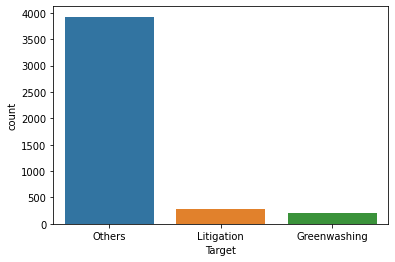

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['Others', 'Litigation','Greenwashing']
ax = sns.countplot(data3.Target)
plt.xlabel('Target')
ax.set_xticklabels(labels);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 425.197x283.465 with 0 Axes>

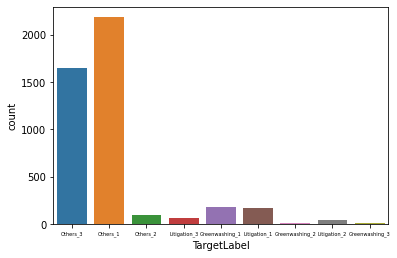

<Figure size 425.197x283.465 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

ax = sns.countplot(data3.TargetLabel)
plt.xlabel('TargetLabel')
plt.tick_params(axis='x', which='major', labelsize=5)
def cm_to_inch(value):
    return value/2.54
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))


In [ ]:
data.drop(data.index, inplace=True)
data1.drop(data1.index, inplace=True)
data2.drop(data2.index, inplace=True)

# Data cleaning

**Remove punctuations, special characters, emojis**

In [ ]:
# removing punctuation down character
def removePunctuationDown(strs):
    remove = '!#$%&\()+,-./:;<=>?@[\]_{|}~'
    pattern = r"[{}]".format(remove)
    h = re.sub(pattern, " ", strs)
    return h

# removing punctuation up character
def removePunctuationUp(strs):
    remove = ',"\^`*'
    # remove = ',"\'^`*'
    pattern = r"[{}]".format(remove)
    h = re.sub(pattern, "", strs)
    return h

# replace other special character
def replace(strs):
  
    strs = strs.replace('\n',' ')
    strs = strs.replace('\t','')
    strs = strs.encode('utf-8').decode('ascii', 'ignore')
    return strs

# remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                               #convert data input to Unicode
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
data3.head(5)

Title  \
0  Climate Change in the Security Council: What New Council ... - ReliefWeb                                                            
1  Climate change is already putting the heat on insurance companies – Auckland's floods could be a turning point - The Conversation   
2  Climate change and changing insurance needs | Mint - Mint                                                                           
3  How Water Finally Became a Climate Change Priority - Scientific American                                                            
4  NATO hosts symposium on climate change and military capabilities - NATO HQ                                                          

       Risk Heading  Target  Category TargetLabel  \
0  Others            Others  3         Others_3     
1  Insurance Trends  Others  3         Others_3     
2  Insurance Trends  Others  3         Others_3     
3  Water Security    Others  3         Others_3     
4  Regulation        Others  3         Others_3     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
data3 = data3.dropna()

**Remove emails, hashtag/mentions etc through regex**

In [ ]:
data3['News'] = [i.lower() for i in data3.News] #lower case
data3['remove_emoji'] = data3['News'].apply(remove_emoji) #remov emoji
data3['hastags'] = [re.findall(r'\B#\w*[a-zA-Z0-9]+\w*', i) for i in data3.remove_emoji] #save hastags
data3['remove_email'] = [re.sub(r'\S*@\S*\s?','',i) for i in data3.remove_emoji] #remove email
data3['remove_hashtag'] = [re.sub("#[A-Za-z0-9_]+",'',i) for i in data3.remove_emoji] #remove hastags
data3['remove_special_character'] = data3['remove_hashtag'].replace(r'http\s+|www.\s+','',regex=True).replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) #remove link
data3['remove_special_character'] = [re.sub(r'</?[a-z]+>','',i) for i in data3.remove_special_character] #remove_special_character
data3['remove_special_character'] = [re.sub('<.*?>+', '', i) for i in data3.remove_special_character] #remove special character
data3['text_clean'] = [removePunctuationDown(i) for i in data3.remove_special_character] #remove punc down
data3['text_clean'] = [removePunctuationUp(i) for i in data3.text_clean] #remove punc up
data3['text_clean'] = [replace(j) for j in data3.text_clean] #remove \n \t

In [ ]:
data3.head(10)

Title  \
0  Climate Change in the Security Council: What New Council ... - ReliefWeb                                                            
1  Climate change is already putting the heat on insurance companies – Auckland's floods could be a turning point - The Conversation   
2  Climate change and changing insurance needs | Mint - Mint                                                                           
3  How Water Finally Became a Climate Change Priority - Scientific American                                                            
4  NATO hosts symposium on climate change and military capabilities - NATO HQ                                                          
5  Climate change, cyber risks and ESG top sector challenges for 2023 ... - Insurance Times                                            
6  Climate crisis and the environment – top news - World Economic Forum                                                                
7  Climate Change, (In)Security, and Women's Narratives in the Lake ... - University of Northern British Columbia                      
8  Long-Term Energy Scenarios Vital for a Renewable-Based Future - UNFCCC                                                              
9  Leaders at Davos need to pay attention to the crossroads of climate ... - STAT                                                      

       Risk Heading  Target  Category TargetLabel  \
0  Others            Others  3         Others_3     
1  Insurance Trends  Others  3         Others_3     
2  Insurance Trends  Others  3         Others_3     
3  Water Security    Others  3         Others_3     
4  Regulation        Others  3         Others_3     
5  Others            Others  3         Others_3     
6  Others            Others  3         Others_3     
7  Others            Others  3         Others_3     
8  Transition Risk   Others  3         Others_3     
9  Others            Others  3         Others_3     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

**Replace short forms and abbreviations and replace multiple spaces with single space**


In [ ]:
def text_clean(text):    
    ## Decontract text            
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)
    
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\’", "\'", text)
    
    # remove all puctuation
    text = re.sub('', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) #remove digit/number
    
    # remove all special characters
    text = re.sub(r'\W', ' ', text)

    # remove break
    text = re.sub('[‘’“”…]', '', text)
    
    # remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text

data3['text_clean'] = data3['text_clean'].apply(lambda x: text_clean(x))
     

**Remove unnecessary fields, keep the cleaned text field**

In [ ]:
data3 = data3[['News', 'text_clean', 'Risk Heading','Target','Category','TargetLabel']]
data3.head(10)

News  \
0  climate change in the security council: what new council ... - reliefweb climate change in the security council: what new council members can achieve in 2023 - world | reliefweb\nskip to main content\nhelp\nhelp\nuser account menu\nlog in\ncontent search\nwhat are you looking for?\nsearch|t\nmain navigation\nupdates\ncountries\ndisasters\norganizations\ntopics\njobs\ntraining\ninforming humanitarians worldwide 24/7 — a service provided by un ocha\nworld\nclimate change in the security council: what new council members can achieve in 2023\nformat\nnews and press release\nsource\nipi\nposted\n30 jan 2023\noriginally published\n30 jan 2023\norigin\nview original\nby adam day, janani vivekananda, and grazia pacillo\n2023 could be a good year for advancing climate-related issues in the united nations security council. the two-year terms of elected council members like india, which have been outspoken opponents of including climate change on the council’s agenda, have ended, and brazil’s newly elected government is likely to be a bit more open to discussing some specific impacts of climate change. and while strong climate, peace and security advocates like kenya, ireland, and norway have rotated out, the incoming elected members include some likely supporters such as switzerland, malta, ecuador, and japan.[1] even the newly elected mozambique, which historically has strong energy ties with russia, has recently stressed the links between climatic factors and the rise of armed groups designated as terrorist in its territory, and now co-chairs the informal expert group on climate security in the council (together with the united arab emirates and switzerland).\nof course, there are headwinds. efforts to include “climate, peace and security” on the regular agenda of the council in recent years have failed, and deep polarization within the council over the war in ukraine means the scope of agreement on new issues may be very narrow. indeed, even the term “climate and security” is fraught, given the indirect links between climatic factors and the risks of violent conflict. it is very possible that the coming year could witness even deeper entrenchment, bringing prospects for advancing climate-related issues down with it. but given the accelerating impacts of climate change around the world, and increasing recognition that climatic factors are indeed affecting a wide range of areas that can drive security risks, the issue is becoming increasingly unavoidable.\nif the ten elected members of the council (e10) wish to advance the climate issue in 2023, they could consider the following six approaches.\ndon’t get dragged under the omnibus\nsince climate change and security was first put on the security council’s agenda 15 years ago, the relationship between the two has only been narrowly recognized by the un body. early attempts to make broad claims about the impacts of climate change on security risks were qualified as “possible” adverse effects that “may, in the long run, aggravate” threats to peace and security. instead of agreeing on so-called thematic resolutions that would acknowledge a categorical relationship between climate change and security, the council has moved forward incrementally through resolutions on the lake chad basin, mali, darfur, and west africa, recognizing only country/region-specific impacts.\nrecent efforts to pass an omnibus resolution that would recognize a general relationship between climate change and security—and importantly place climate change more consistently on the council’s agenda—have failed. this includes germany’s 2020 open debate on climate security and the joint ireland/niger effort in december 2021 to adopt a thematic resolution. the lesson here seems clear, and unlikely to change over the course of the year: avoid an omnibus resolution (for now) and focus instead on incremental progress via country-specific settings where there is strong evidence.\nunite behind the a3\nthe so-called afr

# Convert fields: clean text(x_val) and categories(y_val) to array

In [ ]:
#convert dataframe to values
data_process = data3['text_clean'].values
#label = data3['TargetLabel'].apply(lambda x:x-1).values
label = data3['TargetLabel'].values

**x_val**

In [ ]:
# view data array
data_process[0:10]

array(['climate change in the security council what new council reliefweb climate change in the security council what new council members can achieve in world reliefweb skip to main content help help user account menu log in content search what are you looking for search t main navigation updates countries disasters organizations topics jobs training informing humanitarians worldwide a service provided byun ocha world climate change in the security council what new council members can achieve in format news and press release source ipi posted jan originally published jan origin view original by adam day janani vivekananda and grazia pacillo could be a good year for advancing climate related issues in the united nations security council the two year terms of elected council members like india which have been outspoken opponents of including climate change on the councils agenda have ended and brazils newly elected government is likely to be a bit more open to discussing some specific im

**y_val**

In [ ]:
label

array(['Others_3', 'Others_3', 'Others_3', ..., 'Others_1',
       'Litigation_1', 'Others_1'], dtype=object)

In [ ]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# train test split

1. training+development data to train out model.
2. test data to see how our model performs.

In [ ]:
title_tr, title_te, category_tr, category_te = train_test_split(data_process,label,test_size=0.25, random_state=42)
title_tr, title_de, category_tr, category_de = train_test_split(title_tr,category_tr)
print("Training: ",len(title_tr))
print("Developement: ",len(title_de),)
print("Testing: ",len(title_te))

Training:  2429
Developement:  810
Testing:  1080


**Create a word cloud of frequently occuring strings**

<Figure size 432x288 with 0 Axes>

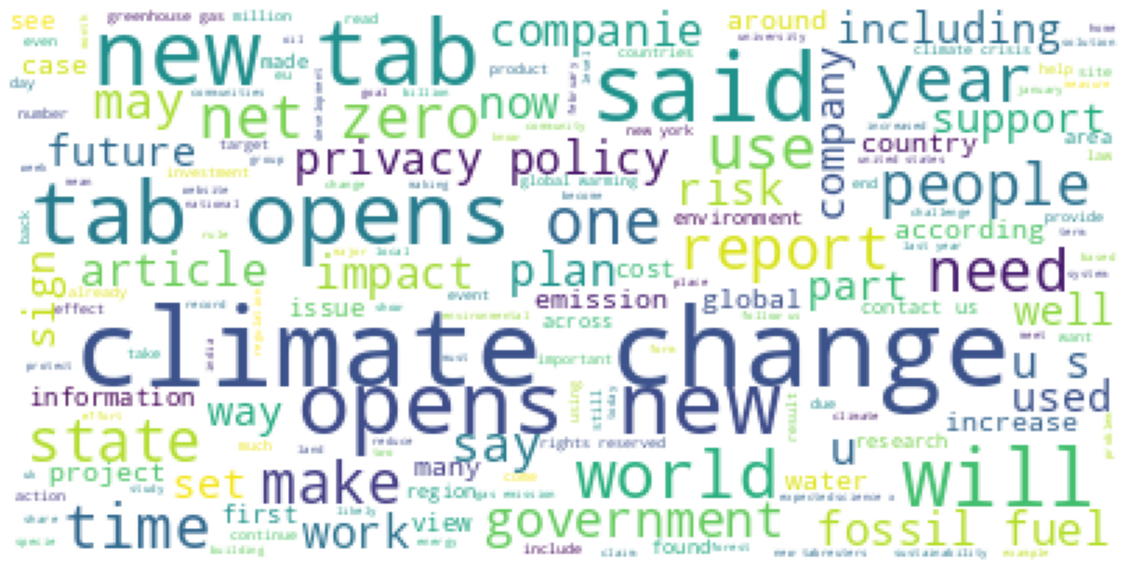

In [ ]:
from wordcloud import WordCloud
text = " ".join(title_tr)
wordcloud = WordCloud().generate(text)
plt.figure()
plt.subplots(figsize=(20,12))
wordcloud = WordCloud(
    background_color="white",
    max_words=len(text),
    max_font_size=40,
    relative_scaling=.5).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Vectorize the data using Bag of words-Tokenize**

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
stop_words = nltk.corpus.stopwords.words("english")
vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_words)

vectorizer.fit(iter(title_tr))
Xtr = vectorizer.transform(iter(title_tr))
Xde = vectorizer.transform(iter(title_de))
Xte = vectorizer.transform(iter(title_te))

encoder = LabelEncoder()
encoder.fit(category_tr)
Ytr = encoder.transform(category_tr)
Yde = encoder.transform(category_de)
Yte = encoder.transform(category_te)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
reverse_vocabulary = {}
vocabulary = vectorizer.vocabulary_
for word in vocabulary:
    index = vocabulary[word]
    reverse_vocabulary[index] = word

vector = vectorizer.transform(iter(['Methane from coal mines can impact climate more than coal plants']))
indexes = vector.indices
for i in indexes:
    print (reverse_vocabulary[i])

climate
coal
impact
methane
mines
plants


**Feature reduction- transforming data from high to dimensional space to low dimensional space by retaining the meaningful properties of the original dataset.**



*   Fetch variance of the feature and drop them based on a threshold



In [ ]:
print("Number of features before reduction : ", Xtr.shape[1])
selection = VarianceThreshold(threshold=0.001)
Xtr_whole = copy.deepcopy(Xtr)
Ytr_whole = copy.deepcopy(Ytr)
selection.fit(Xtr)
Xtr = selection.transform(Xtr)
Xde = selection.transform(Xde)
Xte = selection.transform(Xte)
print("Number of features after reduction : ", Xtr.shape[1])

Number of features before reduction :  84299
Number of features after reduction :  37995


# Sampling data

**Distribution of categories**

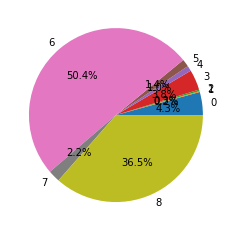

In [ ]:
labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

**As we can see the class labels are not uniformy distributed so we will use RandomOverSampler and oversample the classes which are less in number so that classes are equally distributed**

In [ ]:
data3['TargetLabel'].value_counts()

Others_1          2157
Others_3          1602
Greenwashing_1    174 
Litigation_1      168 
Others_2          90  
Litigation_3      66  
Litigation_2      41  
Greenwashing_3    11  
Greenwashing_2    10  
Name: TargetLabel, dtype: int64

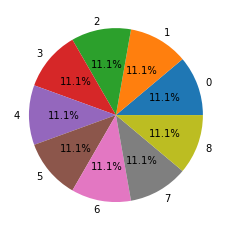

In [ ]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=42)
Xtr, Ytr = sm.fit_resample(Xtr, Ytr)
labels = list(set(Ytr))
counts = []
for label in labels:
    counts.append(np.count_nonzero(Ytr == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

The baseline model is the simplest possible model you can build to create predictions for your use case. The baseline model provides a **point of comparison** against any advanced methods that we may choose to experiment with.
**If you achieve a better score than the baseline, it is good.**


In [ ]:
#Baseline Model
dc = DummyClassifier(strategy="stratified")
dc.fit(Xtr, Ytr)
pred = dc.predict(Xde)
print(classification_report(Yde, pred, target_names=encoder.classes_))

                precision    recall  f1-score   support

Greenwashing_1       0.04      0.12      0.06        32
Greenwashing_2       0.00      0.00      0.00         5
Greenwashing_3       0.01      0.33      0.02         3
  Litigation_1       0.04      0.13      0.06        31
  Litigation_2       0.01      0.20      0.02         5
  Litigation_3       0.00      0.00      0.00        13
      Others_1       0.47      0.10      0.16       419
      Others_2       0.05      0.31      0.08        16
      Others_3       0.33      0.10      0.16       286

      accuracy                           0.10       810
     macro avg       0.11      0.14      0.06       810
  weighted avg       0.37      0.10      0.14       810



A decision tree is one of the supervised machine learning algorithms. This algorithm can be used for regression and classification problems — yet, is mostly used for classification problems. A decision tree follows a **set of if-else conditions** to visualize the data and classify it according to the conditions.

In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(Xtr, Ytr)
pred_dt = dt.predict(Xde)
print(classification_report(Yde, pred_dt, target_names=encoder.classes_))

                precision    recall  f1-score   support

Greenwashing_1       0.60      0.56      0.58        32
Greenwashing_2       0.50      0.20      0.29         5
Greenwashing_3       0.33      0.33      0.33         3
  Litigation_1       0.41      0.42      0.41        31
  Litigation_2       0.20      0.40      0.27         5
  Litigation_3       0.33      0.46      0.39        13
      Others_1       0.75      0.77      0.76       419
      Others_2       0.12      0.25      0.16        16
      Others_3       0.62      0.56      0.59       286

      accuracy                           0.65       810
     macro avg       0.43      0.44      0.42       810
  weighted avg       0.66      0.65      0.65       810



The critical difference between the random forest algorithm and decision tree is that decision trees are graphs that illustrate all possible outcomes of a decision using a branching approach. In contrast, the random forest algorithm output are a **set of decision trees** that work according to the output.

In [ ]:
#Random Forest
rf = RandomForestClassifier(n_estimators=40)
rf.fit(Xtr, Ytr)
pred_rf = rf.predict(Xde)
print(classification_report(Yde, pred_rf, target_names=encoder.classes_))

                precision    recall  f1-score   support

Greenwashing_1       0.53      0.25      0.34        32
Greenwashing_2       0.50      0.20      0.29         5
Greenwashing_3       1.00      0.33      0.50         3
  Litigation_1       0.94      0.55      0.69        31
  Litigation_2       0.60      0.60      0.60         5
  Litigation_3       1.00      0.38      0.56        13
      Others_1       0.86      0.75      0.80       419
      Others_2       0.75      0.19      0.30        16
      Others_3       0.64      0.89      0.75       286

      accuracy                           0.75       810
     macro avg       0.76      0.46      0.54       810
  weighted avg       0.77      0.75      0.74       810



Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. 

**The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.**

In [ ]:
#Multinomial Naive Bayesian
nb = MultinomialNB()
nb.fit(Xtr, Ytr)
pred_nb = nb.predict(Xde)
print(classification_report(Yde, pred_nb, target_names=encoder.classes_))

                precision    recall  f1-score   support

Greenwashing_1       0.27      0.38      0.32        32
Greenwashing_2       0.33      0.20      0.25         5
Greenwashing_3       1.00      0.33      0.50         3
  Litigation_1       0.54      0.71      0.61        31
  Litigation_2       0.27      0.60      0.37         5
  Litigation_3       0.56      0.38      0.45        13
      Others_1       0.89      0.75      0.82       419
      Others_2       0.38      0.19      0.25        16
      Others_3       0.69      0.81      0.74       286

      accuracy                           0.73       810
     macro avg       0.55      0.48      0.48       810
  weighted avg       0.76      0.73      0.74       810



Support vector machines is an algorithm that determines the best decision boundary between vectors that belong to a given group (or category) and vectors that do not belong to it.

In [ ]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(Xtr, Ytr)
pred_svm = svc.predict(Xde)
print(classification_report(Yde, pred_svm, target_names=encoder.classes_))

                precision    recall  f1-score   support

Greenwashing_1       0.41      0.41      0.41        32
Greenwashing_2       1.00      0.20      0.33         5
Greenwashing_3       1.00      0.33      0.50         3
  Litigation_1       0.79      0.61      0.69        31
  Litigation_2       0.25      0.60      0.35         5
  Litigation_3       0.56      0.38      0.45        13
      Others_1       0.88      0.80      0.84       419
      Others_2       0.60      0.19      0.29        16
      Others_3       0.72      0.87      0.79       286

      accuracy                           0.78       810
     macro avg       0.69      0.49      0.52       810
  weighted avg       0.79      0.78      0.77       810



Multi-layer perception is also known as MLP. It is fully connected dense layers, which transform any input dimension to the desired dimension. A multi-layer perception is a neural network that has multiple layers. To create a neural network we combine neurons together so that the outputs of some neurons are inputs of other neurons.

In [ ]:
#Multilayered Perceptron Neural network
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 20), random_state=1, max_iter=400)
mlp.fit(Xtr, Ytr)
pred_mlp = mlp.predict(Xde)
print(classification_report(Yde, pred_mlp, target_names=encoder.classes_))

                precision    recall  f1-score   support

Greenwashing_1       0.33      0.22      0.26        32
Greenwashing_2       0.50      0.20      0.29         5
Greenwashing_3       1.00      0.33      0.50         3
  Litigation_1       0.68      0.61      0.64        31
  Litigation_2       0.57      0.80      0.67         5
  Litigation_3       0.83      0.38      0.53        13
      Others_1       0.83      0.87      0.85       419
      Others_2       0.60      0.19      0.29        16
      Others_3       0.75      0.80      0.78       286

      accuracy                           0.78       810
     macro avg       0.68      0.49      0.53       810
  weighted avg       0.77      0.78      0.77       810



**Multilayered Perceptron Neural network performed best on training set**

# Test Models

                precision    recall  f1-score   support

Greenwashing_1       0.64      0.55      0.59        38
Greenwashing_2       0.00      0.00      0.00         1
Greenwashing_3       0.00      0.00      0.00         1
  Litigation_1       0.57      0.58      0.57        45
  Litigation_2       0.67      0.33      0.44        12
  Litigation_3       0.83      0.26      0.40        19
      Others_1       0.78      0.86      0.82       514
      Others_2       0.11      0.05      0.07        20
      Others_3       0.78      0.75      0.77       430

      accuracy                           0.76      1080
     macro avg       0.49      0.38      0.41      1080
  weighted avg       0.75      0.76      0.75      1080



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

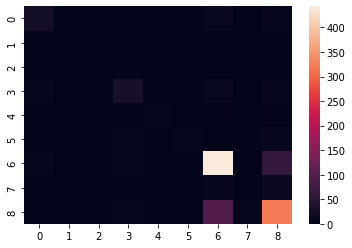

In [ ]:
#predict test data
#Multilayered Perceptron Neural network
predicts = mlp.predict(Xte)
print(classification_report(Yte, predicts, target_names=encoder.classes_))
sns.heatmap(confusion_matrix(Yte, predicts))

In [ ]:
data3['TargetLabel'].value_counts()

Others_1          2157
Others_3          1602
Greenwashing_1    174 
Litigation_1      168 
Others_2          90  
Litigation_3      66  
Litigation_2      41  
Greenwashing_3    11  
Greenwashing_2    10  
Name: TargetLabel, dtype: int64

In [ ]:
#Link to datasets: https://drive.google.com/drive/folders/1SJNEEczVPS7mUDmEfkOnxnqP8IH50Neq

# Actual Vs Predicted labels

In [ ]:
category_list = ["Others_1", "Others_2", "Others_3","Greenwashing_1", "Greenwashing_2", "Greenwashing_3","Litigation_1", "Litigation_2", "Litigation_3"]
for predicted_item, result in zip(predicts, Yte):
    print(category_list[predicted_item], ' - ', category_list[result])

Litigation_1  -  Litigation_3
Litigation_1  -  Litigation_1
Litigation_3  -  Litigation_3
Litigation_3  -  Litigation_1
Litigation_3  -  Litigation_3
Greenwashing_1  -  Litigation_3
Litigation_1  -  Litigation_1
Litigation_1  -  Litigation_1
Others_1  -  Others_1
Litigation_1  -  Litigation_1
Litigation_3  -  Litigation_3
Litigation_3  -  Litigation_3
Litigation_1  -  Litigation_1
Litigation_1  -  Litigation_3
Litigation_1  -  Litigation_1
Litigation_1  -  Litigation_1
Litigation_1  -  Litigation_1
Greenwashing_1  -  Litigation_1
Litigation_3  -  Litigation_3
Litigation_3  -  Litigation_3
Litigation_1  -  Litigation_1
Litigation_3  -  Litigation_3
Litigation_3  -  Litigation_3
Litigation_3  -  Litigation_3
Litigation_3  -  Litigation_3
Litigation_1  -  Litigation_1
Litigation_1  -  Litigation_1
Litigation_3  -  Litigation_1
Litigation_1  -  Litigation_1
Litigation_1  -  Litigation_1
Litigation_1  -  Litigation_1
Greenwashing_1  -  Others_1
Litigation_1  -  Greenwashing_1
Litigation_3  